<a href="https://colab.research.google.com/github/anasjy/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

## In this data set , we will disscus exploratory data analysis and data visualization of hotel booking data set in this project, we need to find average year of arrival and cancellation of data, countries where most customers come from and among other things.

## The data set contains the coloumn are like the hotel is_connected, lead_time etc. the coloumn information is shown below.

# **Import Packages**

# Import necessary packages and dataset.

In [4]:
# we have to import libraries first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline
import folium
sns.set(color_codes=True)
import plotly.express as px 

In [5]:
# importing the data set file of hotel booking from our drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#reading data set file from drive
hotel_inf = pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT/Hotel Bookings.csv')

# **Data processing**
## let's start the data processing where we can observe the customer, country, type of hotel and it's segment.

In [7]:
# its give us all hotel data set information
hotel_inf

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [8]:
#this shape function showing us how many rows and coloumn in data set.
hotel_inf.shape

(119390, 32)

In [13]:
# this fucntion showing us the name of coloumn.
list(hotel_inf.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [14]:
#this fuction showing only five rows of data set from above 
hotel_inf.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
#this fuction show us the last five of data set
hotel_inf.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [16]:
# this describe function describe us everything like maximum values, minimum value, percentage, count, mean and std value of data set
hotel_inf.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [18]:
#this fuction describe the type of dataset like integer, float, boolean and string.
hotel_inf.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [19]:
#this function describe the coloumn,  non-null value and dtype of data set.
hotel_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [20]:
#this fuction count the value of data set like how many booking were booked and canceled
hotel_inf.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

## **After this we are going to deal with Null values**

In [21]:
#Null values
#we put ascending function to show the values first 
hotel_inf.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [13]:
# Dealing with null values in column of agent and company in dataset.
df_null = hotel_inf[['agent','company']].fillna(0.0)
df_null

,agent,company
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,304.0,0.0
4,240.0,0.0
...,...,...
119385,394.0,0.0
119386,9.0,0.0
119387,9.0,0.0
119388,89.0,0.0


## what type of hotel does a costumer book?

In this we are going to discuss the about cutomers what hotel type they booked like city or resort hotel. 

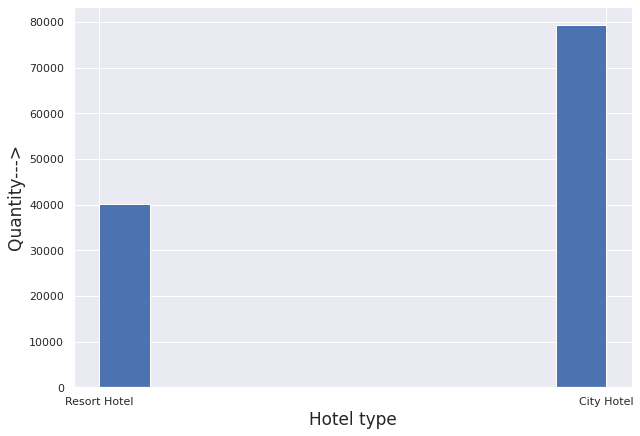

In [14]:
#this plot describe us hotel types and customers booking
fig, ht=plt.subplots(figsize=(10,7))
ht.hist(hotel_inf['hotel'])
#this is how we can file the size of plot
ht.set_xlabel('Hotel type',fontsize=17)
ht.set_ylabel('Quantity--->',fontsize=17)
plt.show()

# As we can see most of customers books city hotel.

# **In which year maximum customer arrive ?**
### we're going to in which year maximux customer are arrive between city hotel and resort hotel

In [24]:
#maximux number arrival of customer as shown:
year_plot = hotel_inf["arrival_date_year"].unique()
year_plot

array([2015, 2016, 2017])

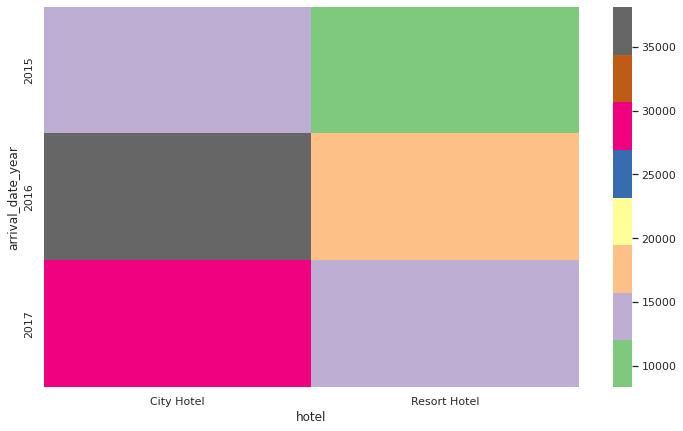

In [29]:
# graph of maximux number arrival of customer:
sns.set(rc={'figure.figsize':(12,7)})
sns.heatmap(pd.crosstab(hotel_inf.arrival_date_year,hotel_inf.hotel),cmap='Accent')

# The result showing us most costumers book city hotel in year 2016.

## **we are going observe how many customer booking were canceled?**
## now we're also showing in graph how many customer canceled booking through out of the year

In [ ]:
#booking cancelled 
canceld = hotel_inf[hotel_inf['is_canceled'] != 0]
canceld

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,April,17,25,0,0,0,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,D,K,1,No Deposit,9.0,NaN,0,Transient,0.0,0,3,Canceled,2017-04-25
111355,City Hotel,1,4,2017,June,23,5,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,4,A,A,0,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-06-05
111924,City Hotel,1,7,2017,May,22,31,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,1,A,A,0,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-05-31
111925,City Hotel,1,6,2017,July,29,17,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,1,1,A,D,0,No Deposit,NaN,238.0,0,Transient,65.0,0,0,No-Show,2017-07-17


In [32]:
#this function define how many row and coloumn
canceld.shape

(44224, 32)

In [64]:
# that show how many booking canceled in number.
total_cancelation = hotel_inf["is_canceled"].sum()
print("Total no. of Cancelation =", total_cancelation)

Resort_cancelation = hotel_inf.loc[hotel_inf["hotel"] == "Resort Hotel"]["is_canceled"].sum()
print("Resort Hotel Cancelation =",Resort_cancelation)

city_cancelation = hotel_inf.loc[hotel_inf["hotel"] == "City Hotel"]['is_canceled'].sum()
print("City Hotel cancelation =",city_cancelation)


Total no. of Cancelation = 44224
Resort Hotel Cancelation = 11122
City Hotel cancelation = 33102


## **its the total estimate of canceled booking and how its works**
### the file contains total booking cancelled = cancelled booking


In [67]:
# total booking canceled
print('Total Bookings cancelled')
print(hotel_inf.is_canceled.value_counts())
# total booking canceled percentage
print('Cancelation percentage')
print(hotel_inf.is_canceled.value_counts(normalize=True))

Total Bookings cancelled
0    75166
1    44224
Name: is_canceled, dtype: int64
Cancelation percentage
0    0.629584
1    0.370416
Name: is_canceled, dtype: float64


# **Bar chart of total booking canceled**
this data set we are discribing how total booking canceled by customers 
and also showing us the plot graph of data set

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



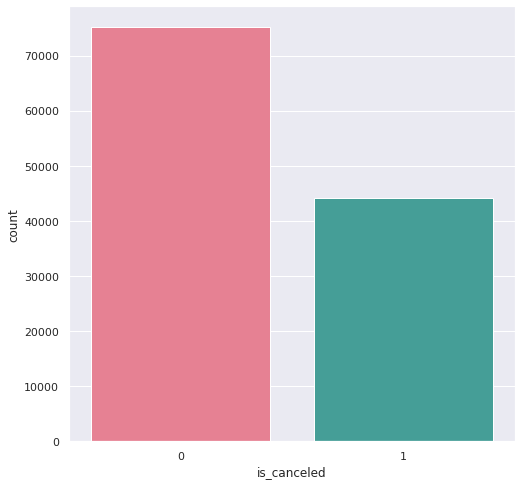

In [68]:
#bar chart of canceled booking
plt.figure(figsize=(8,8))

#Canceled=1, Not canceled= 0
sns.countplot(hotel_inf['is_canceled'], palette='husl')
plt.show()

# As we can see in the result that total booking not canceled is maximum approach

# **How many customer arrival date year ?**

## In this we are discussing about customer arrival date in the year of 2015, 2016, 2017

In [51]:
#maximum year canceled and arrival date
max_each_year_canceled = hotel_inf.groupby("arrival_date_year")["is_canceled"].max().reset_index()
max_each_year_canceled

,arrival_date_year,is_canceled
0,2015,1
1,2016,1
2,2017,1


In [59]:
# its showing the arrival customer count
hotel_inf.arrival_date_year.value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

# plot chart of customer arrive in these 3 years
 this data set and coding describe us the customers arrive in three years of timespan

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



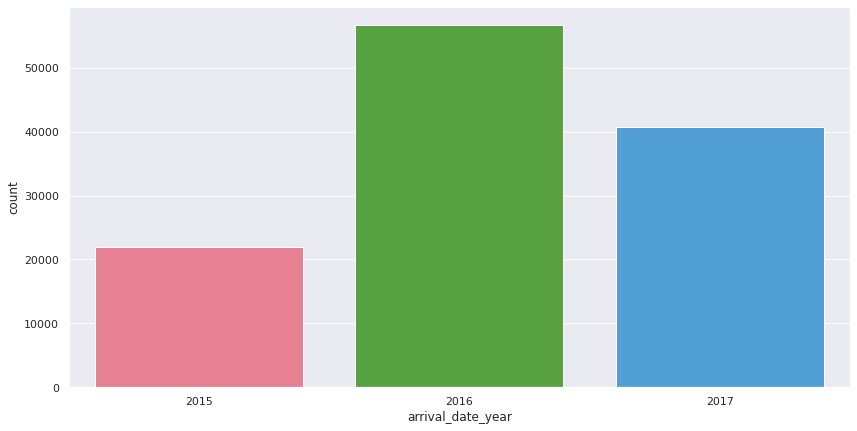

In [61]:
#using countplot method to show customer arrive in this years
plt.figure(figsize=(14,7))
sns.countplot(hotel_inf['arrival_date_year'], palette='husl')
plt.show()

# Now how to count customer from market segment and its type?

### In this we are discribing how market segment of hotel booking type work

In [74]:
#management work and its values count below
hotel_inf.market_segment.value_counts(normalize=True)


Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: market_segment, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



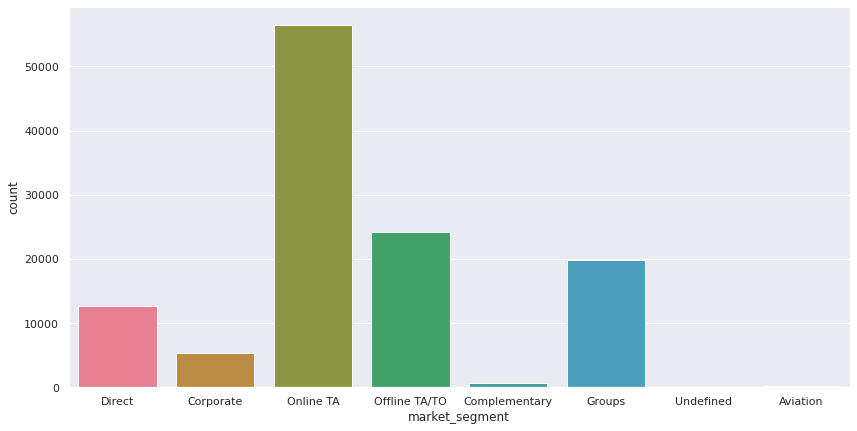

In [75]:
#this graph show how market segment work  
plt.figure(figsize=(14,7))
sns.countplot(hotel_inf['market_segment'], palette='husl')
plt.show()

# The result showing us that most of customers bookings from online TA(Travel agencies).

# **From which country most guests come?**


## In this we are discussing the piechart of customers, which country most of them arrive.
## It's also give us the percentage of customer of the country where most people arrive.


In [86]:
# country and its percentage count where most of customers came from
# taking country names from data csv 
country = hotel_inf['country'].value_counts()
country

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MLI        1
BHS        1
MMR        1
SLE        1
PLW        1
Name: country, Length: 177, dtype: int64

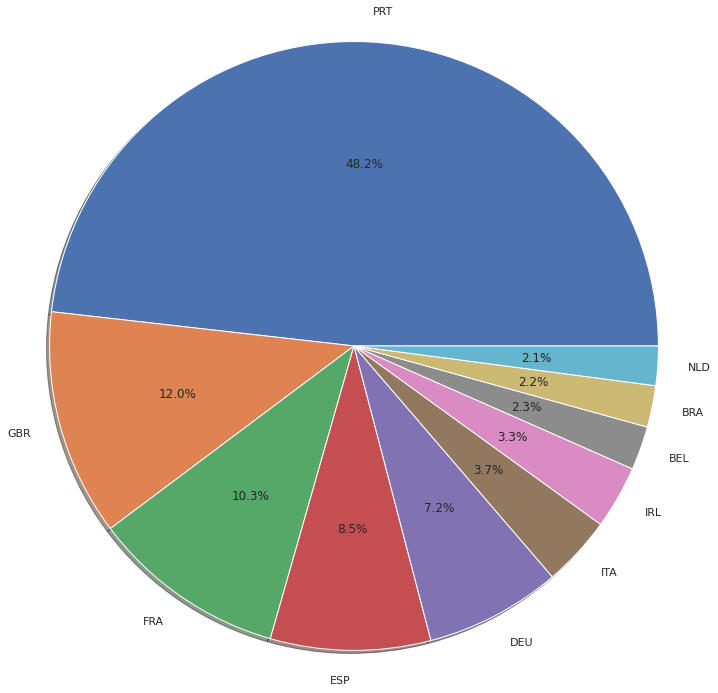

In [90]:
# its showing pie chart of most customers arrive from which country
# we can maximize the radius as much as we can its depend on our system requirment
country.head(10).plot.pie(autopct='%1.1f%%',shadow=True,radius=2)

# This result showing us that almost 50% costumers come from portugal then Great Britain, france, spain and germany and rest.

# **Let’s plot the heatmap and see the correlation**

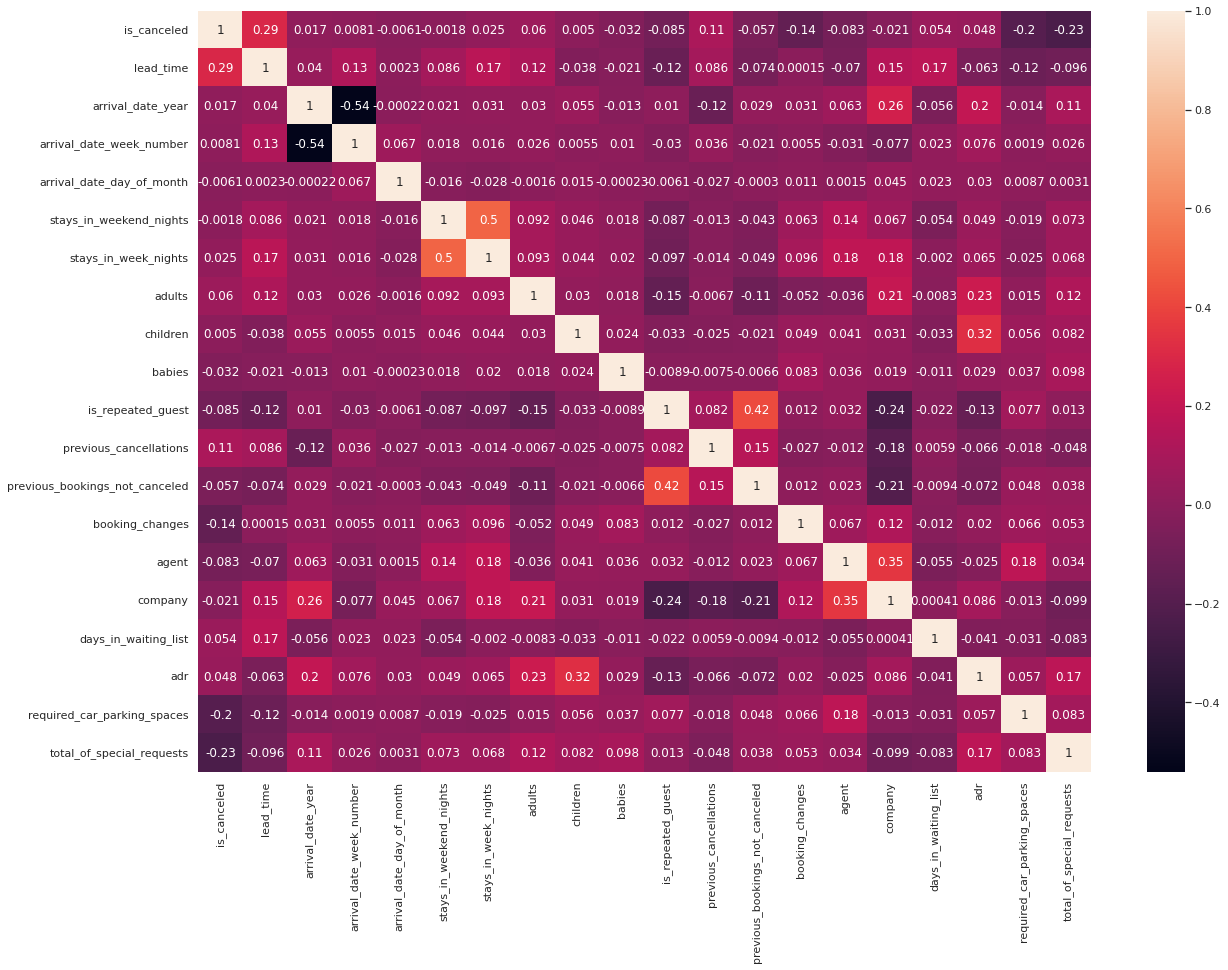

In [91]:
## Plot the heatmap to see correlation with columns
fig, ax = plt.subplots(figsize=(20,14))
sns.heatmap(hotel_inf.corr(), annot=True, ax=ax);

# This data shows us the whole activity in hotel booking data set as you can see above

# **Conclusion:**

## We learned that:



## 1.   Almost 37% of bookings were canceled.
## 2. Maximum population booked the City hotel.

## 3.   Double bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 15% next year
## 4.   Portugal, the UK, and France, Spain and Germany are the top countries from most guests come, Almost 80% come from these 5 countries.


## 5.   Most of the customers booked from Travel agency of segment booking. Almost 48% booking came from travel agency 





  

